Made while following chapter 3 of the book

manually deleting variables because too much memory consumption lolol

In [1]:
import matplotlib as mt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('./mnist_784/data/mnist_784_csv.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, pixel1 to class
dtypes: int64(785)
memory usage: 419.2 MB


In [3]:
y = dataset['class']
X = dataset.drop('class', axis=1)

del dataset

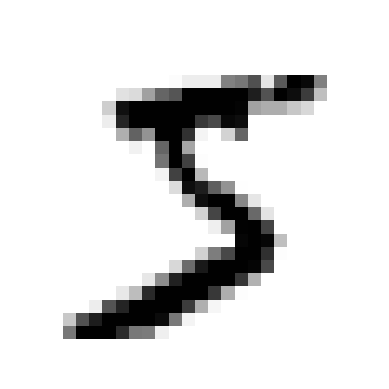

In [5]:
digit = X.iloc[0]
digit_pic = digit.values.reshape(28, 28)

plt.imshow(digit_pic, cmap = mt.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [7]:
y = y.astype(np.int32)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
del X, y

In [8]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

SGDClassifier or Schotastic Gradient Descent Classifier. Well suited for huge datasets. Instances are trained independently, one at a time. Therefore suited for online learning

In [9]:
from sklearn.linear_model import SGDClassifier

sgd_cl = SGDClassifier(random_state=42)
sgd_cl.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

custom cross validation because why not

In [20]:
def cross_validation(n: int, estimator, X: pd.DataFrame, y: pd.DataFrame) -> list:
    from sklearn.base import clone
    from sklearn.model_selection import StratifiedKFold

    scores = []

    split = StratifiedKFold(n, random_state=42, shuffle=True)
    for train_index, test_index in split.split(X, y):
        clone_clf = clone(estimator)
        clone_clf.fit(X.iloc[train_index], y.iloc[train_index])
        pred = clone_clf.predict(X.iloc[test_index])

        n_correct = sum(pred == y.iloc[test_index])
        scores.append(n_correct/len(pred))

    return scores

In [21]:
scores = cross_validation(3, sgd_cl, X_train, y_train_5)
print(scores)

[0.9669, 0.91625, 0.96785]


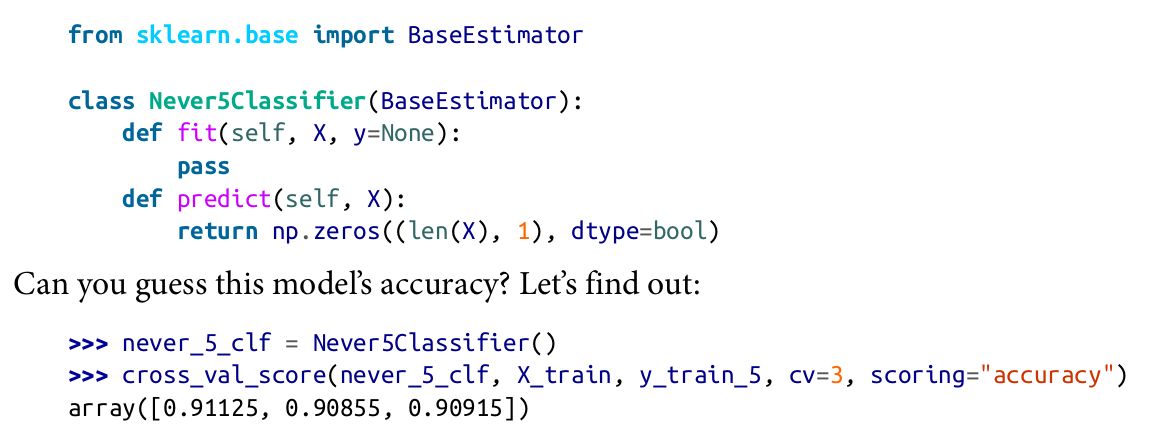
h
accuracy therefore not a good measure in classification problems esp with skewed datasets

Instead we'll use confusion matrix

basically count number of times instances of class A are classified as class B

In [22]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_pred = cross_val_predict(sgd_cl, X_train, y_train_5, cv=3)

confusion_matrix(y_train_5, y_pred)

array([[53892,   687],
       [ 1891,  3530]])

basically means 52892 non 5s were correct, 687 incorrectly classified as 5
1891 5s incorrectly classified as 5, 3530 correct

now accuracy for 5 seems lower